In [1]:
# Import library
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [2]:
# Load json data from file
with open('dataset/imdb_dataset.json', encoding="utf8") as data_file:
    json_data = data_file.read()
data = json.loads(json_data)

In [3]:
# Import data into dataframe
df = pd.DataFrame(data)

In [4]:
# Dataset shape
df.shape

(58623, 16)

In [5]:
# Random sample of dataset
df.sample(5)

,title,rating,year,users_rating,votes,metascore,img_url,countries,languages,actors,genre,tagline,description,directors,runtime,imdb_url
30574,One Sunday Afternoon,Passed,1933,6.8,471,None,https://m.media-amazon.com/images/M/MV5BMTA2OT...,[USA],[English],"[Gary Cooper, Fay Wray, Frances Fuller, Roscoe...","[Comedy, Romance]",He wondered for years...if he'd married the wr...,Middle-aged dentist Biff Grimes reminisces abo...,[Stephen Roberts],85 min,https://www.imdb.com/title/tt0024414/
43389,Bloodmoon,R,1997,5.7,587,None,https://m.media-amazon.com/images/M/MV5BMjAwOT...,[USA],[English],"[Gary Daniels, Chuck Jeffreys, Frank Gorshin, ...","[Action, Thriller]",You get one shot Before he kills you.,Martial arts action film finds a retired detec...,[Siu-Hung Leung],102 min,https://www.imdb.com/title/tt0118745/
25335,Jack and His Friends,R,1992,6.5,34,None,https://m.media-amazon.com/images/G/01/imdb/im...,[USA],[English],"[Paul Barry, Alison Fraser, Allen Garfield, Pa...",[Comedy],None,"Jack is a middle aged, overweight shoe store o...",[Bruce Ornstein],None,https://www.imdb.com/title/tt0104538/
6435,Young Cesar,None,2007,6.0,15,None,https://m.media-amazon.com/images/M/MV5BODA5Nm...,[USA],[English],"[Clifton Powell, Dominic Daniel, Derek Barbosa...","[Crime, Drama]",None,None,[Sheldon Candis],90 min,https://www.imdb.com/title/tt1141279/
686,No Holds Barred,PG-13,1989,4.3,"5,273",None,https://m.media-amazon.com/images/M/MV5BNDBhYm...,[USA],[English],"[Hulk Hogan, Joan Severance, Kurt Fuller, Tomm...","[Action, Sport]",No Ring. No Ref. No Rules.,Rip is the World Wrestling Federation champion...,[Thomas J. Wright],93 min,https://www.imdb.com/title/tt0097987/


## Data Cleaning

In [6]:
# Copy dataset
df_clean = df.copy()

In [7]:
# Check missing values
df_clean.isna().sum()

title               0
rating          19325
year                1
users_rating        1
votes               1
metascore       50215
img_url          4008
countries           0
languages           0
actors              0
genre               0
tagline         23614
description      4133
directors         435
runtime         12174
imdb_url            0
dtype: int64

In [8]:
# Check dataset dtype
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58623 entries, 0 to 58622
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         58623 non-null  object
 1   rating        39298 non-null  object
 2   year          58622 non-null  object
 3   users_rating  58622 non-null  object
 4   votes         58622 non-null  object
 5   metascore     8408 non-null   object
 6   img_url       54615 non-null  object
 7   countries     58623 non-null  object
 8   languages     58623 non-null  object
 9   actors        58623 non-null  object
 10  genre         58623 non-null  object
 11  tagline       35009 non-null  object
 12  description   54490 non-null  object
 13  directors     58188 non-null  object
 14  runtime       46449 non-null  object
 15  imdb_url      58623 non-null  object
dtypes: object(16)
memory usage: 7.2+ MB


### Problem 1

Values in `countries`, `languages`, `actors`, `genre`, and `directors` columns are in list.

In [9]:
# Solve missing value in directors columns
df_clean['directors'].fillna('Unknown', inplace = True)

Extract values from string for `countries`, `languages`, `actors`, `genre`, and `directors` columns.

In [10]:
columns = ['countries', 'languages', 'actors', 'genre', 'directors']

for i in columns:
    df_clean[i] = df_clean[i].apply(lambda x:"|".join(x))

In [11]:
# Check result
df_clean.sample(5)

,title,rating,year,users_rating,votes,metascore,img_url,countries,languages,actors,genre,tagline,description,directors,runtime,imdb_url
31920,The Monkey Talks,None,1927,6.8,25,None,https://m.media-amazon.com/images/M/MV5BMmE2YT...,USA,English,Olive Borden|Jacques Lerner|Don Alvarado|Malco...,Drama,None,A bankrupt circus act plans to revive its fort...,Raoul Walsh,60 min,https://www.imdb.com/title/tt0018170/
46707,"Boeing, Boeing",Not Rated,1965,6.4,"2,308",None,https://m.media-amazon.com/images/M/MV5BZmNkZT...,USA,English|French|German,Tony Curtis|Jerry Lewis|Dany Saval|Christiane ...,Comedy,The In Comedy of the Year about Making Out!,A friend visits his philandering friend just a...,John Rich,102 min,https://www.imdb.com/title/tt0058981/
29742,The Big F,None,2016,6.3,14,None,https://m.media-amazon.com/images/M/MV5BMWNlNT...,USA,English,James Bell|Mia Campbell|Sheri Darling|Patrick ...,Comedy|Horror,None,It's Valentine's Day and Bigfoot is on the loo...,Brian Papandrea,71 min,https://www.imdb.com/title/tt6253276/
31076,The Girl on the Bridge,Not Rated,1951,6.7,113,None,https://m.media-amazon.com/images/M/MV5BMTc3Nj...,USA,English,Hugo Haas|Beverly Michaels|Robert Dane|Anthony...,Drama,She's Man-Bait and Murder !,An elderly watchmaker stops a beautiful young ...,Hugo Haas,76 min,https://www.imdb.com/title/tt0043588/
40696,Jumping Jacks,Not Rated,1952,6.4,766,None,https://m.media-amazon.com/images/M/MV5BNmY2ZT...,USA,English,Dean Martin|Jerry Lewis|Mona Freeman|Don DeFor...,Comedy|Musical,IT'S A RIP-ROARING RIOT! When Dean and Jerry R...,Nightclub comic Hap Smith assumes the identity...,Norman Taurog,96 min,https://www.imdb.com/title/tt0044774/


### Problem 2

One missing value in both `year` and `votes` columns.

In [12]:
# Retrive row(s)
mask = (df_clean['year'].isna() | df_clean['votes'].isna())
df_clean[mask]

,title,rating,year,users_rating,votes,metascore,img_url,countries,languages,actors,genre,tagline,description,directors,runtime,imdb_url
38149,The Wolves of Savin Hill,None,2019,None,None,None,https://m.media-amazon.com/images/M/MV5BMTg1NT...,USA,English,David Cooley|Brian Scannell|Kurt Fuller|Jack M...,Crime|Drama|Horror,None,Childhood friends from Boston drift apart foll...,John Beaton Hill,100 min,https://www.imdb.com/title/tt3800674/
50128,Heartlock,None,None,6.1,77,None,https://m.media-amazon.com/images/M/MV5BNDliN2...,USA,English,Alexander Dreymon|Lesley-Ann Brandt|Erik LaRay...,Crime|Drama|Romance,None,Seasoned inmate Continental takes New York pri...,Jon Kauffman,96 min,https://www.imdb.com/title/tt3329456/


After googled, **Heartlock** is released on 2018 with 5.5 user rating. So replace the missing value with correct one.

In [13]:
# Replace value
df_clean.loc[50128].rating = '5.5'
df_clean.loc[50128].year = '2018'
df_clean.loc[50128]

title                                                   Heartlock
rating                                                        5.5
year                                                         2018
users_rating                                                  6.1
votes                                                          77
metascore                                                    None
img_url         https://m.media-amazon.com/images/M/MV5BNDliN2...
countries                                                     USA
languages                                                 English
actors          Alexander Dreymon|Lesley-Ann Brandt|Erik LaRay...
genre                                         Crime|Drama|Romance
tagline                                                      None
description     Seasoned inmate Continental takes New York pri...
directors                                            Jon Kauffman
runtime                                                    96 min
imdb_url  

Number of votes for **The Wolves of Savin Hill** cannot be found, replace with average vote().

In [14]:
# Remove non numeric values
df_clean['votes'] = df_clean['votes'].apply(lambda x: re.sub('[^0-9]+', '', str(x)))

In [15]:
# Find mean votes
votes_mean = pd.to_numeric(df_clean['votes']).mean()
votes_mean

10233.316826447408

In [16]:
# Replace value
df_clean.loc[38149].votes = '10233'
df_clean.loc[38149]

title                                    The Wolves of Savin Hill
rating                                                       None
year                                                         2019
users_rating                                                 None
votes                                                       10233
metascore                                                    None
img_url         https://m.media-amazon.com/images/M/MV5BMTg1NT...
countries                                                     USA
languages                                                 English
actors          David Cooley|Brian Scannell|Kurt Fuller|Jack M...
genre                                          Crime|Drama|Horror
tagline                                                      None
description     Childhood friends from Boston drift apart foll...
directors                                        John Beaton Hill
runtime                                                   100 min
imdb_url  

After missing value is removed, convert to integer.

In [17]:
# Convert to int
columns = ['year', 'votes']

for i in columns:
    df_clean[i] = df_clean[i].astype('int')

In [18]:
# Check result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58623 entries, 0 to 58622
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         58623 non-null  object
 1   rating        39299 non-null  object
 2   year          58623 non-null  int32 
 3   users_rating  58622 non-null  object
 4   votes         58623 non-null  int32 
 5   metascore     8408 non-null   object
 6   img_url       54615 non-null  object
 7   countries     58623 non-null  object
 8   languages     58623 non-null  object
 9   actors        58623 non-null  object
 10  genre         58623 non-null  object
 11  tagline       35009 non-null  object
 12  description   54490 non-null  object
 13  directors     58623 non-null  object
 14  runtime       46449 non-null  object
 15  imdb_url      58623 non-null  object
dtypes: int32(2), object(14)
memory usage: 6.7+ MB


### Problem 3

Convert `users_rating` to float. Fill na with mean().

In [19]:
df_clean['users_rating'] = df_clean['users_rating'].astype('float')

In [20]:
# Check result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58623 entries, 0 to 58622
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         58623 non-null  object 
 1   rating        39299 non-null  object 
 2   year          58623 non-null  int32  
 3   users_rating  58622 non-null  float64
 4   votes         58623 non-null  int32  
 5   metascore     8408 non-null   object 
 6   img_url       54615 non-null  object 
 7   countries     58623 non-null  object 
 8   languages     58623 non-null  object 
 9   actors        58623 non-null  object 
 10  genre         58623 non-null  object 
 11  tagline       35009 non-null  object 
 12  description   54490 non-null  object 
 13  directors     58623 non-null  object 
 14  runtime       46449 non-null  object 
 15  imdb_url      58623 non-null  object 
dtypes: float64(1), int32(2), object(13)
memory usage: 6.7+ MB


In [21]:
# Replace missing values
df_clean['users_rating'].fillna(df_clean['users_rating'].mean(), inplace = True)

### Problem 4

Convert `metascore` to int. But since there are many missing values, replace the missing values with '0' first convert to integer.

In [22]:
# Replace missing values
df_clean['metascore'].fillna('0', inplace = True)

In [23]:
# Convert to int
df_clean['metascore'] = df_clean['metascore'].astype('int')

In [24]:
# Check result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58623 entries, 0 to 58622
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         58623 non-null  object 
 1   rating        39299 non-null  object 
 2   year          58623 non-null  int32  
 3   users_rating  58623 non-null  float64
 4   votes         58623 non-null  int32  
 5   metascore     58623 non-null  int32  
 6   img_url       54615 non-null  object 
 7   countries     58623 non-null  object 
 8   languages     58623 non-null  object 
 9   actors        58623 non-null  object 
 10  genre         58623 non-null  object 
 11  tagline       35009 non-null  object 
 12  description   54490 non-null  object 
 13  directors     58623 non-null  object 
 14  runtime       46449 non-null  object 
 15  imdb_url      58623 non-null  object 
dtypes: float64(1), int32(3), object(12)
memory usage: 6.5+ MB


### Problem 5

Convert `runtime` to int. But since there are many missing values, replace the missing values with '0' first convert to integer and remove min from field.

In [25]:
# Replace missing values
df_clean['runtime'].fillna('0', inplace = True)

In [26]:
# Extract numeric values only from field
df_clean['runtime'] = df_clean['runtime'].apply(lambda x: re.sub('[^0-9]+', '', str(x)))

In [27]:
# Convert to int
df_clean['runtime'] = df_clean['runtime'].astype('int')

In [28]:
# Check result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58623 entries, 0 to 58622
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         58623 non-null  object 
 1   rating        39299 non-null  object 
 2   year          58623 non-null  int32  
 3   users_rating  58623 non-null  float64
 4   votes         58623 non-null  int32  
 5   metascore     58623 non-null  int32  
 6   img_url       54615 non-null  object 
 7   countries     58623 non-null  object 
 8   languages     58623 non-null  object 
 9   actors        58623 non-null  object 
 10  genre         58623 non-null  object 
 11  tagline       35009 non-null  object 
 12  description   54490 non-null  object 
 13  directors     58623 non-null  object 
 14  runtime       58623 non-null  int32  
 15  imdb_url      58623 non-null  object 
dtypes: float64(1), int32(4), object(11)
memory usage: 6.3+ MB


In [29]:
df_clean.sample(5)

,title,rating,year,users_rating,votes,metascore,img_url,countries,languages,actors,genre,tagline,description,directors,runtime,imdb_url
8361,West of the Brazos,Approved,1950,6.0,30,0,https://m.media-amazon.com/images/M/MV5BNTBjNT...,USA,English,James Ellison|Russell Hayden|Raymond Hatton|Fu...,Western,Battlin' Back To Back... for the riches of a r...,"Returning to see his mother, Shamrock gets int...",Thomas Carr,58,https://www.imdb.com/title/tt0043125/
43709,Faith of Our Fathers,PG-13,2015,3.5,533,20,https://m.media-amazon.com/images/M/MV5BMjI4Nj...,USA,English,Kevin Downes|David A.R. White|Stephen Baldwin|...,Drama,A Story of Fatherhood. A Journey of Brotherhood.,Two men embark on a trip to the Vietnam Vetera...,Carey Scott,96,https://www.imdb.com/title/tt1322393/
7746,Son of the Guardsman,None,1946,6.1,29,0,https://m.media-amazon.com/images/M/MV5BMjJmMW...,USA,English,Robert Shaw|Daun Kennedy|Robert 'Buzz' Henry|J...,Adventure,None,"England, 12th century. David Trent is a noblem...",Derwin Abrahams,0,https://www.imdb.com/title/tt0038967/
33974,Captain Caution,Approved,1940,5.5,213,0,https://m.media-amazon.com/images/M/MV5BNjYxND...,USA,English|French,Victor Mature|Louise Platt|Leo Carrillo|Bruce ...,Action|Adventure|Romance,None,"When her father dies, a young woman helps a yo...",Richard Wallace,86,https://www.imdb.com/title/tt0032304/
16543,Impulse Black,Not Rated,2011,6.2,554,0,https://m.media-amazon.com/images/M/MV5BMTQwMD...,USA,English,Jordon Hodges|Emme Rylan|Robert Miano|Will Bru...,Drama|Sci-Fi,None,"What do Riley Cole, Hitler, President Truman, ...",Bugs Moran,52,https://www.imdb.com/title/tt1800307/


### Problem 6

Replace null values `rating`, `img_url`, `tagline`, `description`.

In [30]:
columns = ['rating', 'img_url', 'tagline', 'description']

for i in columns:
    df_clean[i].fillna('Unknown', inplace = True)

In [31]:
df_clean.isna().sum()

title           0
rating          0
year            0
users_rating    0
votes           0
metascore       0
img_url         0
countries       0
languages       0
actors          0
genre           0
tagline         0
description     0
directors       0
runtime         0
imdb_url        0
dtype: int64

### Remove outliers

In [32]:
df_clean.describe([.80, .90, .95])

,year,users_rating,votes,metascore,runtime
count,58623.000000,58623.000000,5.862300e+04,58623.000000,58623.000000
mean,1986.807123,5.942269,1.023332e+04,7.492435,71.445508
std,29.489752,1.369225,5.628595e+04,19.514225,41.897049
min,1903.000000,1.000000,5.000000e+00,0.000000,0.000000
50%,1999.000000,6.100000,1.220000e+02,0.000000,85.000000
80%,2013.000000,7.100000,1.655600e+03,0.000000,99.000000
90%,2015.000000,7.600000,9.897600e+03,42.000000,109.000000
95%,2017.000000,8.000000,4.192160e+04,60.000000,119.000000
max,2019.000000,10.000000,2.031143e+06,100.000000,1428.000000


It is seem like `votes` and `runtime` consists of outliers. Draw histogram

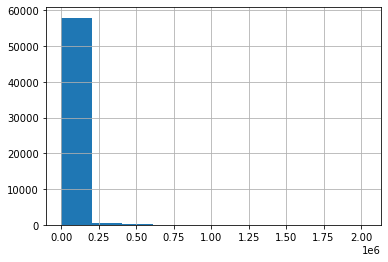

In [33]:
df_clean['votes'].hist();

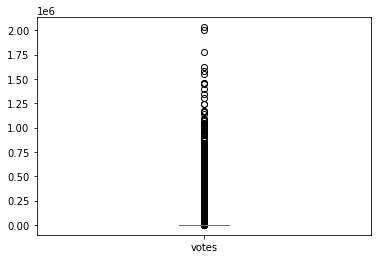

In [34]:
df_clean['votes'].plot(kind='box');

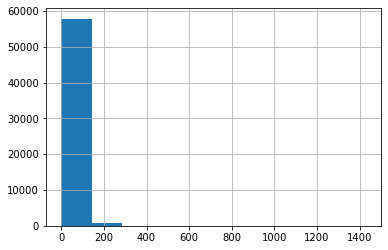

In [35]:
df_clean['runtime'].hist();

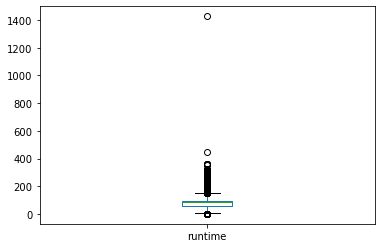

In [36]:
df_clean['runtime'].plot(kind='box');

In [37]:
# Remove votes > 10000
df_clean = df_clean.query("votes <= 10000")

In [38]:
# Remove runtime > 110 
df_clean = df_clean.query("runtime <= 110")

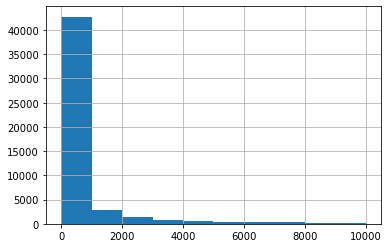

In [39]:
df_clean['votes'].hist();

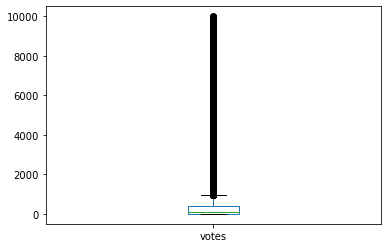

In [40]:
df_clean['votes'].plot(kind='box');

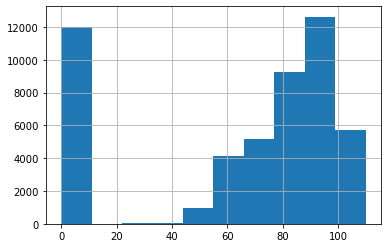

In [41]:
df_clean['runtime'].hist();

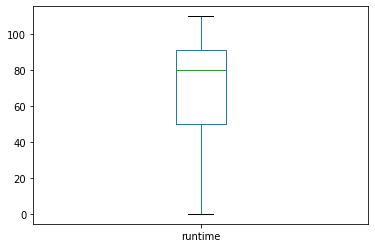

In [42]:
df_clean['runtime'].plot(kind='box');

# Data Normalization

In [43]:
min_max_scaler = MinMaxScaler()
df_clean[["votes", "runtime"]] = min_max_scaler.fit_transform(df_clean[["votes", "runtime"]])

In [44]:
df_clean

,title,rating,year,users_rating,votes,metascore,img_url,countries,languages,actors,genre,tagline,description,directors,runtime,imdb_url
10,Prancer,G,1989,6.4,0.397839,0,https://m.media-amazon.com/images/M/MV5BMjEyOT...,USA|Canada,English,Sam Elliott|Cloris Leachman|Rutanya Alda|Abe V...,Drama|Family|Fantasy,They lost the true spirit of Christmas...And f...,A farm girl nurses a wounded reindeer she beli...,John D. Hancock,0.936364,https://www.imdb.com/title/tt0098115/
36,1985,Unknown,2018,6.7,0.031819,71,https://m.media-amazon.com/images/M/MV5BNzM2Yj...,USA,English,Jamie Chung|Virginia Madsen|Bill Heck|Michael ...,Drama,Unknown,A closeted young man goes home for the holiday...,Yen Tan,0.772727,https://www.imdb.com/title/tt6411590/
40,Antidote,Unknown,2018,3.2,0.004803,0,https://m.media-amazon.com/images/M/MV5BZjEzZD...,USA,English,Randy Couture|Chuck Zito|Wil Traval|Mindy Robi...,Action|Adventure|Horror|Thriller,Unknown,An altruistic doctor (Natali Yura) and cocky t...,Ken Barbet,0.000000,https://www.imdb.com/title/tt3809960/
52,Ashes in the Snow,Unknown,2018,8.1,0.121073,0,https://m.media-amazon.com/images/M/MV5BOGFjMz...,USA|Lithuania,English,Bel Powley|Peter Franzén|Sophie Cookson|James ...,Drama|History|Romance|War,Inspired by True Events.,"In 1941, a 16 year-old aspiring artist and her...",Marius A. Markevicius,0.890909,https://www.imdb.com/title/tt3759298/
61,A-X-L,PG,2018,5.1,0.352311,29,https://m.media-amazon.com/images/M/MV5BMzhmMW...,USA,English,Alex Neustaedter|Becky G|Alex MacNicoll|Domini...,Action|Adventure|Family|Sci-Fi,Man's best friend has evolved,"A.X.L. is a top-secret, robotic dog who develo...",Oliver Daly,0.000000,https://www.imdb.com/title/tt5709188/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58618,Black Dragon,Unknown,2003,5.7,0.001001,0,https://m.media-amazon.com/images/M/MV5BMTUwOT...,USA,English,Stephen Benitzhar|Lewis Borders|Aliina Buckner...,Action|Fantasy|Thriller,Would you exchange your soul to live your fant...,One man's life is altered by the hand of fate....,Charley Rice,0.000000,https://www.imdb.com/title/tt0770170/
58619,Hold That Line,Approved,1952,6.7,0.019412,0,https://m.media-amazon.com/images/M/MV5BYzRiYj...,USA,English,Leo Gorcey|Huntz Hall|John Bromfield|Veda Ann ...,Action|Comedy|Sport,They're a SCREAM Team Of All-American RIOTS!,"In a precursor to Trading Places (1983), the B...",William Beaudine,0.609091,https://www.imdb.com/title/tt0044714/
58620,Jam Session,Approved,1944,6.4,0.012708,0,https://m.media-amazon.com/images/M/MV5BMjk1Zj...,USA,English,Ann Miller|Jess Barker|Charles D. Brown|Eddie ...,Comedy|Music,IT'S A JIVE HIT! (original print ad-all caps),Terry Baxter is a never-say-die Hollywood newc...,Charles Barton,0.700000,https://www.imdb.com/title/tt0036966/
58621,The Black Pirates,Unknown,1954,5.5,0.002602,0,https://m.media-amazon.com/images/M/MV5BZDQyOG...,USA|Mexico|El Salvador,English,Anthony Dexter|Martha Roth|Lon Chaney Jr.|Robe...,Adventure,Wild raiders of the tropic seas!,Pirates searching for treasure take over a sma...,Allen H. Miner,0.672727,https://www.imdb.com/title/tt0046787/


# Data Reduction

In [45]:
pca = PCA() 
  
df_clean['votes_pca'] = pca.fit_transform(df_clean[['votes']]) 
df_clean['runtime_pca'] = pca.fit_transform(df_clean[['runtime']])

In [46]:
df_clean

,title,rating,year,users_rating,votes,metascore,img_url,countries,languages,actors,genre,tagline,description,directors,runtime,imdb_url,votes_pca,runtime_pca
10,Prancer,G,1989,6.4,0.397839,0,https://m.media-amazon.com/images/M/MV5BMjEyOT...,USA|Canada,English,Sam Elliott|Cloris Leachman|Rutanya Alda|Abe V...,Drama|Family|Fantasy,They lost the true spirit of Christmas...And f...,A farm girl nurses a wounded reindeer she beli...,John D. Hancock,0.936364,https://www.imdb.com/title/tt0098115/,0.337624,-0.354972
36,1985,Unknown,2018,6.7,0.031819,71,https://m.media-amazon.com/images/M/MV5BNzM2Yj...,USA,English,Jamie Chung|Virginia Madsen|Bill Heck|Michael ...,Drama,Unknown,A closeted young man goes home for the holiday...,Yen Tan,0.772727,https://www.imdb.com/title/tt6411590/,-0.028396,-0.191335
40,Antidote,Unknown,2018,3.2,0.004803,0,https://m.media-amazon.com/images/M/MV5BZjEzZD...,USA,English,Randy Couture|Chuck Zito|Wil Traval|Mindy Robi...,Action|Adventure|Horror|Thriller,Unknown,An altruistic doctor (Natali Yura) and cocky t...,Ken Barbet,0.000000,https://www.imdb.com/title/tt3809960/,-0.055412,0.581392
52,Ashes in the Snow,Unknown,2018,8.1,0.121073,0,https://m.media-amazon.com/images/M/MV5BOGFjMz...,USA|Lithuania,English,Bel Powley|Peter Franzén|Sophie Cookson|James ...,Drama|History|Romance|War,Inspired by True Events.,"In 1941, a 16 year-old aspiring artist and her...",Marius A. Markevicius,0.890909,https://www.imdb.com/title/tt3759298/,0.060858,-0.309517
61,A-X-L,PG,2018,5.1,0.352311,29,https://m.media-amazon.com/images/M/MV5BMzhmMW...,USA,English,Alex Neustaedter|Becky G|Alex MacNicoll|Domini...,Action|Adventure|Family|Sci-Fi,Man's best friend has evolved,"A.X.L. is a top-secret, robotic dog who develo...",Oliver Daly,0.000000,https://www.imdb.com/title/tt5709188/,0.292096,0.581392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58618,Black Dragon,Unknown,2003,5.7,0.001001,0,https://m.media-amazon.com/images/M/MV5BMTUwOT...,USA,English,Stephen Benitzhar|Lewis Borders|Aliina Buckner...,Action|Fantasy|Thriller,Would you exchange your soul to live your fant...,One man's life is altered by the hand of fate....,Charley Rice,0.000000,https://www.imdb.com/title/tt0770170/,-0.059214,0.581392
58619,Hold That Line,Approved,1952,6.7,0.019412,0,https://m.media-amazon.com/images/M/MV5BYzRiYj...,USA,English,Leo Gorcey|Huntz Hall|John Bromfield|Veda Ann ...,Action|Comedy|Sport,They're a SCREAM Team Of All-American RIOTS!,"In a precursor to Trading Places (1983), the B...",William Beaudine,0.609091,https://www.imdb.com/title/tt0044714/,-0.040803,-0.027699
58620,Jam Session,Approved,1944,6.4,0.012708,0,https://m.media-amazon.com/images/M/MV5BMjk1Zj...,USA,English,Ann Miller|Jess Barker|Charles D. Brown|Eddie ...,Comedy|Music,IT'S A JIVE HIT! (original print ad-all caps),Terry Baxter is a never-say-die Hollywood newc...,Charles Barton,0.700000,https://www.imdb.com/title/tt0036966/,-0.047507,-0.118608
58621,The Black Pirates,Unknown,1954,5.5,0.002602,0,https://m.media-amazon.com/images/M/MV5BZDQyOG...,USA|Mexico|El Salvador,English,Anthony Dexter|Martha Roth|Lon Chaney Jr.|Robe...,Adventure,Wild raiders of the tropic seas!,Pirates searching for treasure take over a sma...,Allen H. Miner,0.672727,https://www.imdb.com/title/tt0046787/,-0.057613,-0.091335
